$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\,\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\mde}[1]{\frac{\text{D}{#1}}{\text{D}t}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\text{i}}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$
$\newcommand{\dfa}[1]{\left< #1 \right>}$
$\newcommand{\gf}[1]{\overline{#1}}$
$\newcommand{\ttau}[1]{\dfa{\tilde\tau_{#1}}}$
$\newcommand{\btau}[1]{\overline{\tau}_{#1}}$

# Exciting internal waves in a circular tank

## Stratification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gsw.density import rho
from gsw import SP_from_SK
from scipy.constants import g, pi

def pressure(heights):
    # P0 = 1e5
    return -rho0*g*heights

rho0 = 1e3  # reference density

### Thursday, May 25 at 5 pm

Temperature was between 21.9 and 22.4$^\circ$C.

In [2]:
May25_5pm = {
    'heights': np.arange(-1e-2, -8.5e-2, -1e-2),
    # I believe S in ppt is called "Knudsen Salinity". GSW can convert.
    'salinitiesK': np.array(  # in ppt
        [13.9, 19.2, 24.6, 36.7, 55.5, 61.5, 61.6, 61.6])}

May25_5pm['temperatures'] = np.linspace(21.9, 22.4, len(May25_5pm['heights']))
# kind of gross to linearly interpolate like this but OK

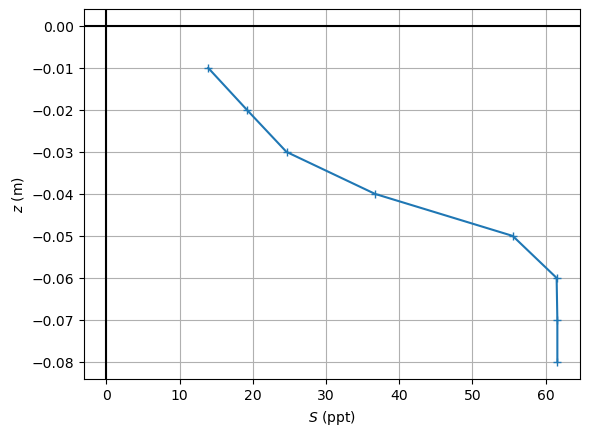

In [3]:
plt.plot(May25_5pm['salinitiesK'], May25_5pm['heights'], '+-')
plt.xlabel("$S$ (ppt)")
plt.ylabel("$z$ (m)")
plt.axhline(0., c='k')
plt.axvline(0., c='k')
plt.grid()

In [4]:
May25_5pm['salinitiesP'] = SP_from_SK(May25_5pm['salinitiesK'])
print(May25_5pm['salinitiesP'])

[13.88191053 19.18646177 24.59109889 36.70148947 55.51763352 61.52278587
 61.62287175 61.62287175]


In [5]:
pressure(May25_5pm['heights'])

array([ 98.0665, 196.133 , 294.1995, 392.266 , 490.3325, 588.399 ,
       686.4655, 784.532 ])

In [6]:
May25_5pm['densities'] = rho(
    May25_5pm['salinitiesP'], May25_5pm['temperatures'], 
    pressure(May25_5pm['heights']))
print(May25_5pm['densities'])

[1008.82645343 1013.18201543 1017.60460201 1027.00507033 1041.40048879
 1046.22924792 1046.67637846 1047.04855684]


In [7]:
May25_5pm['N2'] = -(g/rho0)*np.gradient(
    May25_5pm['densities'], May25_5pm['heights'])
print(May25_5pm['N2'])

[ 4.27134721  4.30421154  6.77789307 11.66789665  9.42623906  2.58694017
  0.40173379  0.36498231]


The two-axis plot comes from a [Matplotlib example](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py).

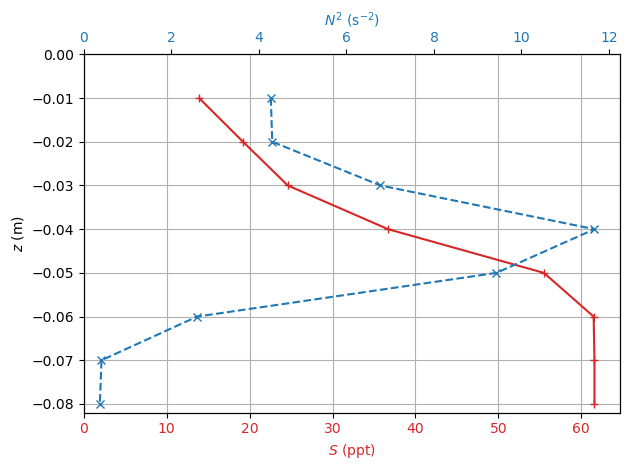

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(May25_5pm['salinitiesK'], May25_5pm['heights'], '+-', c=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylabel('$z$ (m)')
ax1.set_xlabel('$S$ (ppt)', color=color)
ax1.set_xlim(0., np.max(May25_5pm['salinitiesK'])*1.05)
ax1.set_ylim(-0.082, 0.)
ax1.grid()

ax2 = ax1.twiny()  # instantiate a second axes that shares the same y-axis

color = 'tab:blue'
ax2.plot(May25_5pm['N2'], May25_5pm['heights'], 'x--', color=color)
ax2.set_xlabel('$N^2$ (s$^{-2}$)', color=color)  # we already handled the x-label with ax1
ax2.set_xlim(0., np.max(May25_5pm['N2'])*1.05)
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('WePlottedSomething.png')

### Friday, May 26 at 3:45 pm

Jon had to stir it a little in the morning to remove bubbles that had accumulated along the side of the tank.

In [9]:
May26_4pm = {
    'heights': np.arange(0.e-2, -10.5e-2, -1e-2),
    # I believe S in ppt is called "Knudsen Salinity". GSW can convert.
    'salinitiesK': np.array(  # in ppt
        [18.2, 23.9, 31.1, 44.4, 53.2, 58.3, 59.5, 59.9, 60.0, 60.1, 60.1])}

# Fix the first and last because they weren't exactly at 0 and 10 cm deep
May26_4pm['heights'][0] = -1e-3
May26_4pm['heights'][-1] = -9.8e-2
print(May26_4pm['heights'])

May26_4pm['temperatures'] = np.array([
    22.5, 22.5, 22.6, 22.7, 22.75, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8])
# kind of gross to fill up gaps like this but OK

[-0.001 -0.01  -0.02  -0.03  -0.04  -0.05  -0.06  -0.07  -0.08  -0.09
 -0.098]


In [10]:
May26_4pm['salinitiesP'] = SP_from_SK(May26_4pm['salinitiesK'])
May26_4pm['densities'] = rho(
    May26_4pm['salinitiesP'], May26_4pm['temperatures'],
    pressure(May26_4pm['heights']))
May26_4pm['N2'] = -(g/rho0)*np.gradient(
    May26_4pm['densities'], May26_4pm['heights'])

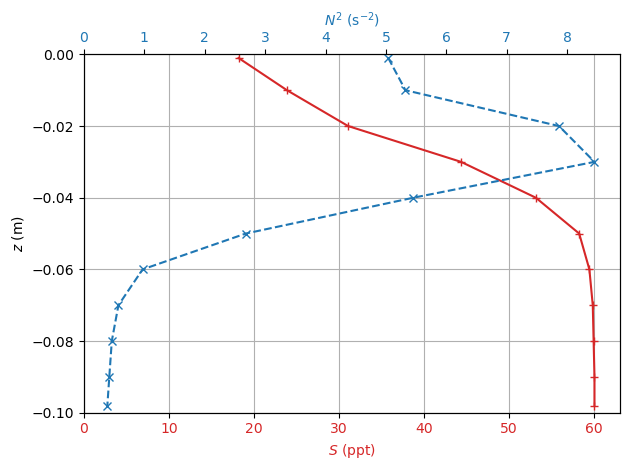

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(May26_4pm['salinitiesK'], May26_4pm['heights'], '+-', c=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylabel('$z$ (m)')
ax1.set_xlabel('$S$ (ppt)', color=color)
ax1.set_xlim(0., np.max(May26_4pm['salinitiesK'])*1.05)
ax1.set_ylim(-0.1, 0.)
ax1.grid()

ax2 = ax1.twiny()  # instantiate a second axes that shares the same y-axis

color = 'tab:blue'
ax2.plot(May26_4pm['N2'], May26_4pm['heights'], 'x--', color=color)
ax2.set_xlabel('$N^2$ (s$^{-2}$)', color=color)  # we already handled the x-label with ax1
ax2.set_xlim(0., np.max(May26_4pm['N2'])*1.05)
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('WePlottedSomething.png')

In the video `20230526_161544.mp4`, I tried to time the period of the oscillations.

In [12]:
tours = np.array([2.88, 3.48, 3., 3.12, 3.42, 2.78, 3.38])
Tavg = np.mean(tours)
l0 = (Tavg/(2*pi))**2  # initial guess for lambda is 1/omega**2

### Friday, May 26 at 4:55 pm

After some SLIMING. Note that the purple dye bottomed out at 5 or 5.5 cm.

In [13]:
May26_5pm = {
    'heights': May26_4pm['heights'],
    # I believe S in ppt is called "Knudsen Salinity". GSW can convert.
    'salinitiesK': np.array(  # in ppt
        [31.6, 40.5, 45.2, 49.2, 53.0, 58.8, 59.9, 60.1, 60.1, 60.1, 60.1]),
    'temperatures': May26_4pm['temperatures']  # we didn't measure to be honest
    }

May26_5pm['salinitiesP'] = SP_from_SK(May26_5pm['salinitiesK'])
May26_5pm['densities'] = rho(
    May26_5pm['salinitiesP'], May26_5pm['temperatures'],
    pressure(May26_5pm['heights']))
May26_5pm['N2'] = -(g/rho0)*np.gradient(
    May26_5pm['densities'], May26_5pm['heights'])

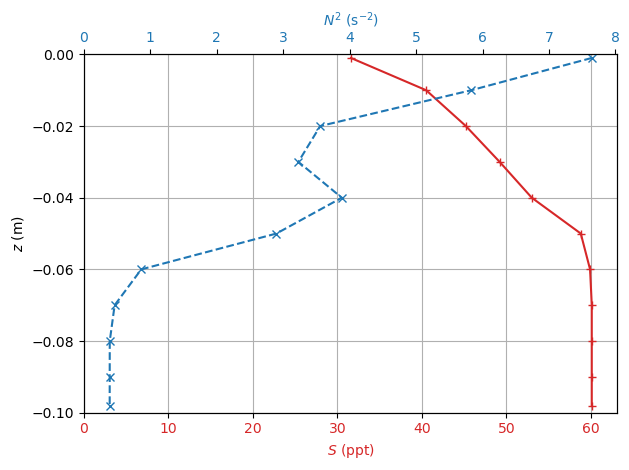

In [14]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(May26_5pm['salinitiesK'], May26_5pm['heights'], '+-', c=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylabel('$z$ (m)')
ax1.set_xlabel('$S$ (ppt)', color=color)
ax1.set_xlim(0., np.max(May26_5pm['salinitiesK'])*1.05)
ax1.set_ylim(-0.1, 0.)
ax1.grid()

ax2 = ax1.twiny()  # instantiate a second axes that shares the same y-axis

color = 'tab:blue'
ax2.plot(May26_5pm['N2'], May26_5pm['heights'], 'x--', color=color)
ax2.set_xlabel('$N^2$ (s$^{-2}$)', color=color)  # ax1 already handled x-label
ax2.set_xlim(0., np.max(May26_5pm['N2'])*1.05)
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('WePlottedSomething.png')

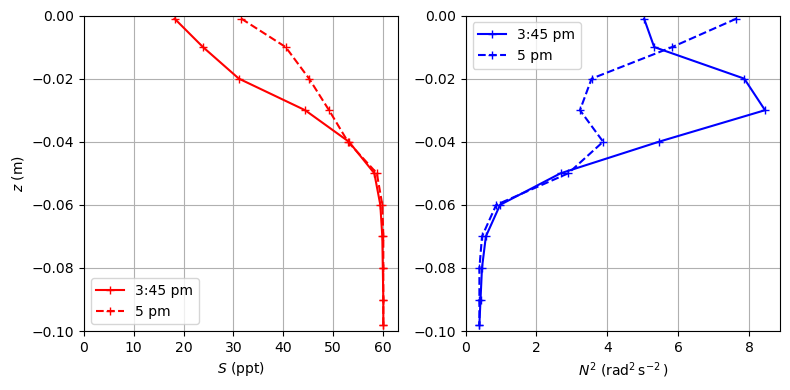

In [15]:
fig, ax1 = plt.subplots(1, 2, figsize=(8, 4))

ax1[0].plot(May26_4pm['salinitiesK'], May26_4pm['heights'], '+-', c='r', label='3:45 pm')
ax1[0].plot(May26_5pm['salinitiesK'], May26_5pm['heights'], '+--', c='r', label='5 pm')
ax1[0].set_ylabel('$z$ (m)')
ax1[0].set_xlabel('$S$ (ppt)')
ax1[0].set_xlim(0., np.max(May26_5pm['salinitiesK'])*1.05)
ax1[0].set_ylim(-0.1, 0.)
ax1[0].grid()
ax1[0].legend()

ax1[1].plot(May26_4pm['N2'], May26_4pm['heights'], '+-', c='b', label='3:45 pm')
ax1[1].plot(May26_5pm['N2'], May26_5pm['heights'], '+--', c='b', label='5 pm')
ax1[1].set_xlabel('$N^2$ (rad$^2\,$s$^{-2}\,$)')
ax1[1].set_xlim(0., np.max(May26_4pm['N2'])*1.05)
ax1[1].set_ylim(-0.1, 0.)
ax1[1].grid()
ax1[1].legend()

plt.tight_layout()

# Which frequencies can we expect?

## Some math

Recall that the tank has a radius of $R = 17$ cm and we filled it up to $H = 11$ cm (I think).
We are interested in axisymmetric motion $\boldsymbol u = (u, 0, w)$, for which we can define an azimuthal stream function $\psi$ such that
$$
u = -\frac1r\frac{\partial(r\psi)}{\partial z} = -\frac{\partial\psi}{\partial z} \quad\text{and}\quad w = \frac1r\frac{\partial(r\psi)}{\partial r}.
$$

The governing equation for axisymmetric monochromatic ($\psi = \hat\psi_m e^{-i\omega_m t}$) waves is
$$
\frac{N^2(z) - \omega_m^2}{\omega_m^2}\left(\frac1r\left(r\hat\psi_m\right)_r\right)_{r} + \psi_{zz} = 0.
$$

One can demonstrate (Boury et al.) that
$$\psi_m = \sum_{n=1}^\infty \Psi_{mn}(z)J_1(k_{n} r)$$
I don't know why it's $J_1$, it might be simply out of convenience. Indeed, one can use any order of Bessel function in a Bessel-Fourier decomposition, and the first one might work better with the other quantities... I guess? Didn't check. And for $u$ to cancel at $r=R$, we need $J_1(k_{n}R)= 0$, which determines the $k_n$'s. (I also didn't check.)

Honestly, this all runs a little counter to how I know Bessel functions work, but again, I did not check anything in detail. I'm sure it works.

Plugging everything in, we can show that
$$
\Psi''_{mn} + k^2_n\left(\lambda_{mn} N^2 - 1\right)\Psi_{mn} = 0,
$$
where $\lambda_m = \omega_{mn}^{-2}$.
Boury et al. have a different sign in front of $k^2_n$, I think it's a mistake. So, for a given $k_n$, we have an infinite number of $(\omega_{mn}, \Psi_{mn})$.

The modes we will find will be associated with the orthogonality relations
$$
\int_{-H}^0 (\lambda_{mn}N^2 - 1)\Psi_{mn}\Psi_{pn} \text{d}z = A_{mn}^2\delta_{pm},
$$
and so we will normalize each $\Psi_{mn}$ we find by $A_{mn}$.

At any rate, we must solve this with a shooting method.

Split the problem into
$$
\Psi' = \Phi \quad \text{and} \quad \Phi' = -k_n^2\left[\lambda_{mn}N^2(z) - 1\right]\Psi,
$$
with initial conditions $\Psi_0 = \Psi|_{z=-H} = 0$ and $\Phi_0 = \Psi'|_{z=-H} = u|_{z=-H} \sim 1~\text{cm}\,\text{s}^{-1}$ (I don't think that the last value matters).

In [16]:
from scipy.special import j1, jn_zeros  # j1 is a faster version of jv for v=1
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

Rds = 0.17  # Tank radius
Hght = 0.11  # Tank height
zeros = jn_zeros(1, 5)  # first 5 zeros for J1
kns = zeros/Rds

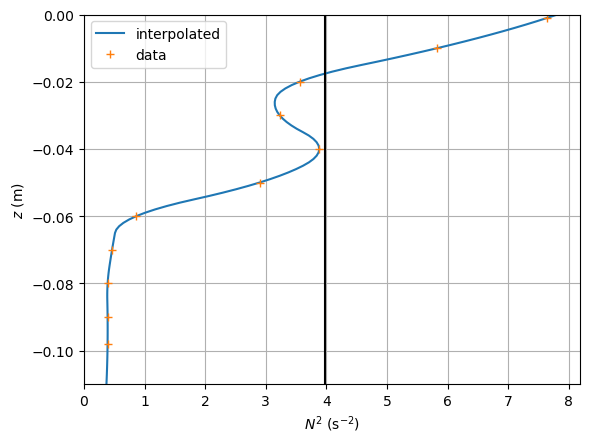

In [26]:
# Define an interpolated function for N^2
exp = May26_5pm
N2fcn = interp1d(exp['heights'], exp['N2'], kind='quadratic',
                 fill_value='extrapolate')

zgrid = np.linspace(-Hght, 0., 111)
plt.plot(N2fcn(zgrid), zgrid, label='interpolated')
plt.plot(exp['N2'], exp['heights'], '+', label='data')
plt.legend()
plt.grid()
plt.axvline(1/l0, c='k')
plt.ylim([-Hght, 0.])
plt.xlabel('$N^2$ (s$^{-2})$')
plt.ylabel('$z$ (m)')
plt.show()

In [18]:
def rhs(z, y, k2, lmbda):
    return [y[1], -k2*(lmbda*N2fcn(z) - 1)*y[0]]

In [19]:
def cross_zero(z, y, k2, lmbda):
    """ Will pass this to solve_ivp to detect zero crossings """
    return y[0]

In [20]:
def shoot(k2, lmbda):
    """ kn: radial wavenumber squared; lmbda=1/omega**2 """
    psi0 = 0.
    phi0 = 1e-2  # dpsi/dz at bottom = -ubot, guesstimate 1 cm/s
    y0 = [psi0, phi0]
    return solve_ivp(rhs, t_span=[-Hght, 0.], t_eval=zgrid, y0=y0,
                     args=(k2, lmbda), events=cross_zero)

3.975070179929448
7.643607893312213 7.8104046299210035


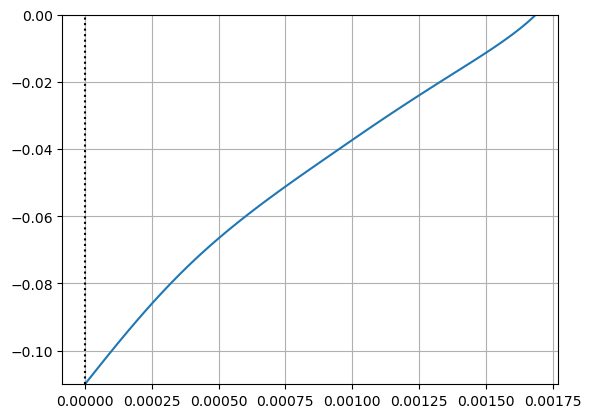

In [41]:
print(1/l0)
print(np.max(exp['N2']), np.max(N2fcn(zgrid)))
sol = shoot(kns[0]**2, l0)
# print(sol)
plt.plot(sol.y[0], sol.t)
plt.grid()
plt.ylim([-Hght, 0.])
plt.axvline(0., c='k', ls=':')

In [118]:
def mode_amplitude(lmbda, profile):
    return (np.trapz((lmbda*N2fcn(zgrid) - 1)*profile**2, zgrid))**.5


def find_modes(k2, l0, mmax):
    """  """
    tolerance = 1e-15
    lambdas = []
    psis = []
    for mm in range(mmax):
        nzeros = -1
        counter_nzs = 0  # how many times we tried to find correct number of 0s
        # The method will stop whenever it finds *a* psi that reaches zero
        # on top. But often, it is the wrong mode. Need to keep track of it.
        while (nzeros != mm) and (counter_nzs < 100):
            counter_nzs += 1
            last_lambda_init = l0  # to keep track of the mode number
            l1 = 1.01*l0  # New lambda
            psi1 = shoot(k2, l0).y[0]  # new psi (1st one turns old soon)
            # We change lambda to find the zero of psi[-1] with secant method
            counter = 0

            while (abs(l1/l0 - 1) > tolerance) and (counter < 1000):
                counter += 1
                psi0, psi1 = psi1, shoot(k2, l1).y[0]
                end0, end1 = psi0[-1], psi1[-1]
                l0, l1 = l1, l1 - end1*(l1-l0)/(end1 - end0)  # secant method

            # Now we count how many times psi crosses zero
            nzeros = 0
            for event in shoot(k2, l1).t_events[0]:
                # print(event, -0.99*Hght, )
                if -0.99*Hght < event < -0.01*Hght:
                    # Top and bottom zeros not always recorded and don't count
                    nzeros += 1
                
            print("  mm = {0}, number of zeros = {1}".format(mm, nzeros))
            if nzeros == mm:
                # We found the correct mode
                print("-> Bingo. T = {1:.2f} s".format(nzeros, 2*pi*l0**.5))
                # plt.axvline(0., c='k')
                lambdas.append(l1)
                psis.append(psi1/mode_amplitude(l1, psi1))
                l0 = 1.5*l1  # l0 for the next mode search
            elif nzeros > mm:
                # Frequency is too low, i.e., initial lambda guess was too
                # high. We try again with an initial lambda that is halfway 
                # between lambda of the last successful mode search and
                # last initial l0 we tried.
                print("  -x Trying smaller initial lambda")
                l0 = 0.5*(last_lambda_init + lambdas[-1])
            elif nzeros < mm:
                # We probably found the previous mode. Let's try a little harder
                print("  -x Trying larger initial lambda")
                l0 = 1.5*last_lambda_init
                
    return  lambdas, psis

In [119]:
# Our initial guess is close to 1/N2: we start from the almost highest frequency
# and make our way down. (Convention is the opposite)
nmax = 5  # How many modes we compute
kmode = 0
lambdas, psis = find_modes(kns[kmode]**2, 1.1/max(exp['N2']), nmax)

  mm = 0, number of zeros = 0
-> Bingo. T = 6.55 s
  mm = 1, number of zeros = 0
  -x Trying larger initial lambda
  mm = 1, number of zeros = 1
-> Bingo. T = 12.56 s
  mm = 2, number of zeros = 10
  -x Trying smaller initial lambda
  mm = 2, number of zeros = 1
  -x Trying larger initial lambda
  mm = 2, number of zeros = 2
-> Bingo. T = 19.01 s
  mm = 3, number of zeros = 3
-> Bingo. T = 24.75 s
  mm = 4, number of zeros = 4
-> Bingo. T = 29.74 s


I will plot the envelopes for $\Psi_{mn}$ for the radial mode $n$ we chose above, as well as the radial velocity envelopes $U_{mn} = -\partial\Psi_{mn}/\partial z$ because the eye picks it up more easily.

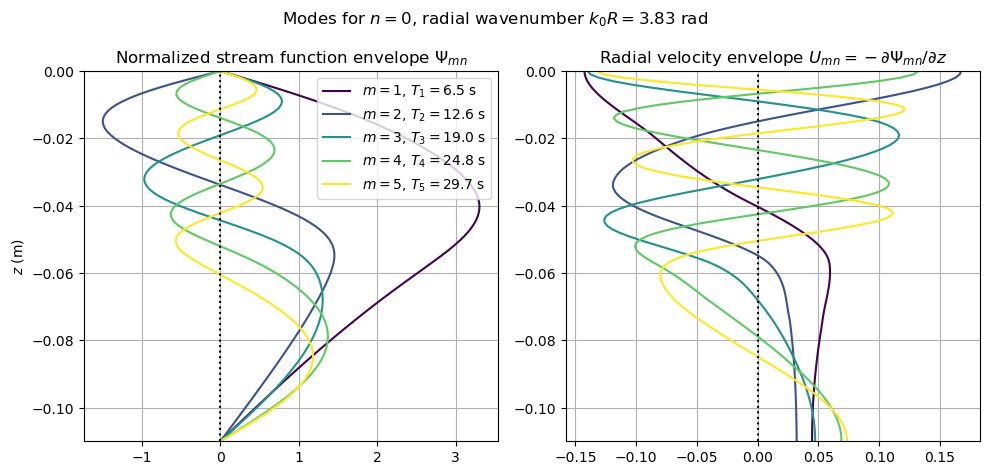

In [139]:
# print(1/l0)
# print(np.max(exp['N2']), np.max(N2fcn(zgrid)))
# sol = shoot(kns[0]**2, l0)
# print(sol)
fg, ax = plt.subplots(1, 2, figsize=(10, 4.8))
fg.suptitle("Modes for $n={0}$, radial wavenumber $k_{0}R = {1:.2f}$ rad".format(
    kmode, Rds*kns[kmode]))
for mm in range(nmax):
    pos_in_cmap = int(mm/(nmax-1)*256)
    lbl_strng = '$m = {0}$, $T_{0} = {1:>2.1f}$ s'.format(
        mm+1, 2*pi*lambdas[mm]**.5)
    ax[0].plot(psis[mm], zgrid, c=plt.cm.viridis(pos_in_cmap), label=lbl_strng)
    Umode = np.gradient(psis[mm])
    # Umode /= mode_amplitude(lambdas[mm], Umode)  # normalizing
    ax[1].plot(Umode, zgrid, c=plt.cm.viridis(pos_in_cmap), label=lbl_strng)
for ii in range(2):
    ax[ii].grid()
    ax[ii].set_ylim([-Hght, 0.])
    ax[ii].axvline(0., c='k', ls=':')
ax[0].set_title('Normalized stream function envelope $\Psi_{mn}$')
ax[0].set_ylabel('$z$ (m)')
ax[0].legend()
ax[1].set_title(
    'Radial velocity envelope $U_{mn} = -\partial\Psi_{mn}/\partial z$')
# ax[1].legend()

plt.tight_layout()